In [2]:
'''PREFERENCES'''

#test file
targetFileName = '50-2D'
# Number of test repetitions
loop_cnt = 1
#whether visualize graph or not
graph_visualization = True

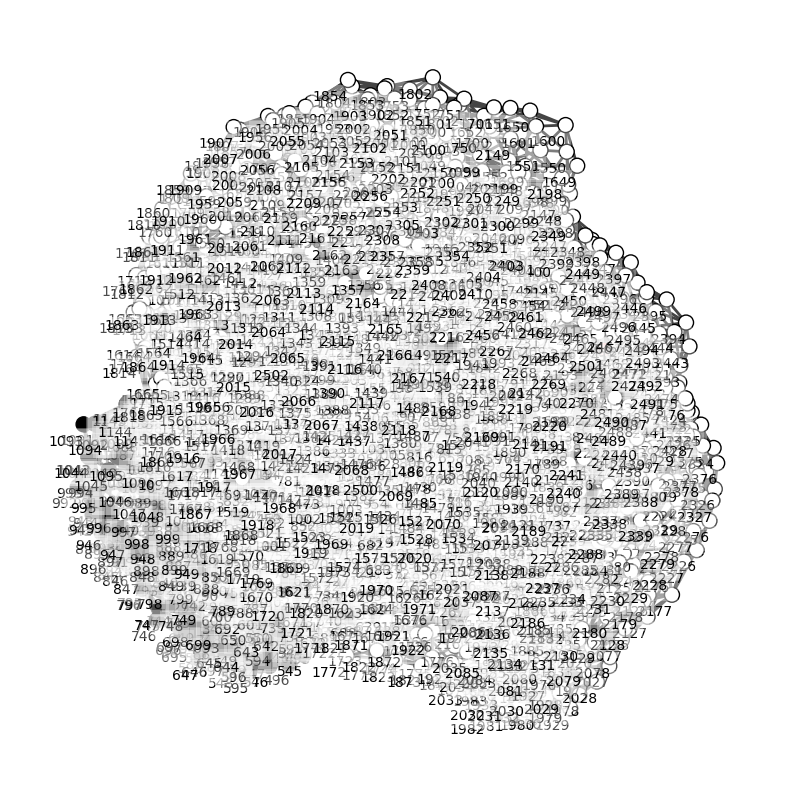

testFile-50-2D Results
STAT_n passed
STAT_e passed
STAT_n_D passed
STAT_n_A passed
STAT_CC_D passed
STAT_CC_A passed
STAT_CC_D_An passed
STAT_CC_A_Ca passed
ABS_f_D passed
CT_f_conn_D_An passed
CT_f_conn_A_Ca passed
CT_n_D_adj_An failed - 0 is not the same as expected 1
CT_n_A_adj_Ca failed - 0 is not the same as expected 1
Total time to calculate graph: 1.1531856060028076 second(s)
Total time to calculate descriptors: 0.2699291706085205 second(s)
Peak memory usage for graph generation: 2708563 bytes
Peak memory usage for descriptor calculation: 19149 bytes
{'STAT_n': 2500, 'STAT_e': 50, 'STAT_n_D': 1250, 'STAT_n_A': 1250, 'STAT_CC_D': 1, 'STAT_CC_A': 1, 'STAT_CC_D_An': 0, 'STAT_CC_A_Ca': 0, 'ABS_f_D': 0.5, 'CT_f_conn_D_An': 0.0, 'CT_f_conn_A_Ca': 0.0, 'CT_n_D_adj_An': 0, 'CT_n_A_adj_Ca': 0, 'time': 0.2699291706085205, 'mem': 19149}



In [3]:
import igraph_testing as ig
import importlib
import descriptors as ds
import os  
import time
import matplotlib.pyplot as plt
import tracemalloc

importlib.reload(ig)  # 강제 리로드
importlib.reload(ds)  # 강제 리로드

current_dir = os.getcwd()
data_path = f"{current_dir}/graspi_igraph/data/"
descriptors_path = f"{current_dir}/graspi_igraph/p1descriptors/"
test_files = [os.path.splitext(file)[0] for file in os.listdir(data_path)]
epsilon=1e-5

times = []
mems = []
time_mem_stats = {}

    
for test_file in test_files:
    if targetFileName not in test_file:
        continue

    import time
    total_graph_time = 0
    for i in range(loop_cnt):

        # g = ig.generateGraph(data_path + test_file + ".txt")
        tracemalloc.start()
        graph_start = time.time()
        g,is_2D, black_vertices, white_vertices, black_green, black_interface_red, white_interface_blue, dim, interface_edge_comp_paths, shortest_path_to_red, shortest_path_to_blue, CT_n_D_adj_An, CT_n_A_adj_Ca= ig.generateGraph(data_path + test_file + ".txt")
        _stats = tracemalloc.get_traced_memory()
        graph_end = time.time()     
        tracemalloc.stop()
        graph_mem = _stats[1]-_stats[0]  
        stats = ds.desciptors(g)
        total_graph_time += graph_end - graph_start
        #ig.visual2D(g, 'graph')
        # g = ig.generateGraph("2D-testFile/testFile-10-2D.txt")     # utilizing the test file found in 2D-testFiles folder as an example
        if graph_visualization:
            ig.visualize(g,is_2D)
    print(f"{test_file} Results")

    with open(descriptors_path + "p1descriptors." + test_file + ".log") as f:
        for line in f:
            stat = line.strip().split(" ")
            try:
                # if stats.get(stat[0], -1) == int(stat[1]):
                if abs(stats.get(stat[0], -1) - float(stat[1])) < epsilon:
                    print(f"{stat[0]} passed")
                elif stats.get(stat[0], -1) != -1 and stats.get(stat[0], -1) != int(stat[1]):
                    print(f"{stat[0]} failed - {stats.get(stat[0])} is not the same as expected {stat[1]}")
            except ValueError:
                if abs(stats.get(stat[0], -1) - float(stat[1])) < epsilon:
                    print(f"{stat[0]} passed")
                elif stats.get(stat[0], -1) != -1 and stats.get(stat[0], -1) != float(stat[1]):
                    print(f"{stat[0]} failed - {stats.get(stat[0])} is not the same as expected {stat[1]}")
    descriptor_time = stats["time"]
    descriptor_mem = stats["mem"]

    times.append(descriptor_time)
    mems.append(descriptor_mem)

    graph_time = total_graph_time/loop_cnt
    print(f"Total time to calculate graph: {graph_time} second(s)")
    print(f"Total time to calculate descriptors: {descriptor_time} second(s)")
    print(f"Peak memory usage for graph generation: {graph_mem} bytes")
    print(f"Peak memory usage for descriptor calculation: {descriptor_mem} bytes")
    print(stats)
    print("")
    time_mem_stats[test_file] = {"graph_time": graph_time, "descriptor_time": descriptor_time,  "graph_mem":graph_mem, "descriptor_mem": descriptor_mem}

